# Exploratory Data Analysis (EDA)


##Mount gDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Bengkel Coding Data Saince/')

Mounted at /content/drive


Koneksikan ke google drive untuk penyimpanan dataset danjuga .jpynb

##import Libarry|

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import time

from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


Import libary yang digunakan untuk mengolah dan mengvisualisasikan data set beserta pemodelanya

##import dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bengkel Coding Data Saince/Tugas 4/adult.csv')

Sebelum di masukan nama:

In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


##Data preProsesing

###cek data hilang


In [ ]:
print("Jumlah missing values:")
print(df.isnull().sum())

Jumlah missing values:
39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###Hapus Missing Values (jika ada)


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###Cek data Duplikasi

In [ ]:
print(f"Duplikasi ditemukan: {df.duplicated().sum()} baris")
df = df.drop_duplicates()

Duplikasi ditemukan: 24 baris


setelah ditemukan sebanyak 24 baris maka akan di hapus data yg duplikat itu

###Cek Tipe Data

In [ ]:
print(df.dtypes)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


###Buatkan label untuk mempermudah pembacaan pada dataset

In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns=["age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain",
                 "capitalloss","hoursperweek","nativecountry","income"]

In [ ]:
df.head()


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


###Cek Outlier (menggunakan Z-score)

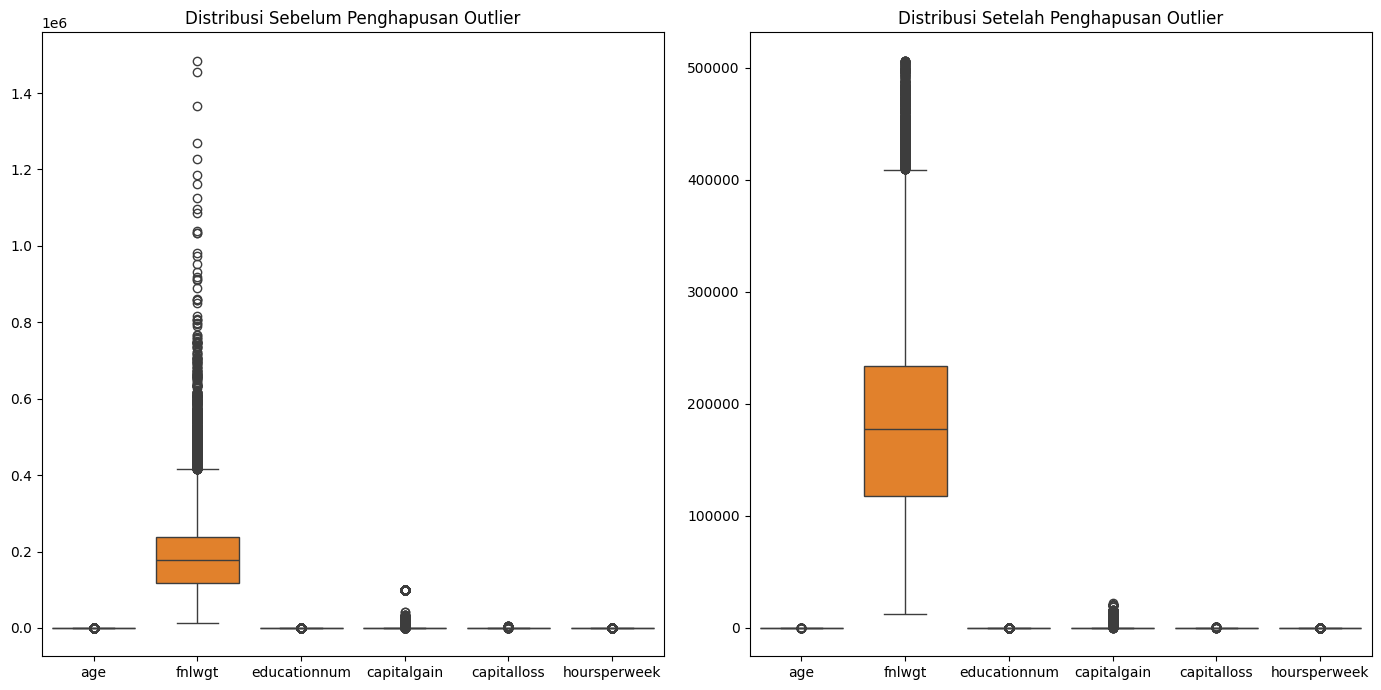

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(df[numeric_cols]))


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.boxplot(data=df[numeric_cols], ax=axes[0])
axes[0].set_title('Distribusi Sebelum Penghapusan Outlier')


df_cleaned = df[(z_scores < 3).all(axis=1)]
sns.boxplot(data=df_cleaned[numeric_cols], ax=axes[1])
axes[1].set_title('Distribusi Setelah Penghapusan Outlier')

plt.tight_layout()
plt.show()

###Encoding data bertipe Kategorikal

In [ ]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.dtypes)

age              int64
workclass        int64
fnlwgt           int64
education        int64
educationnum     int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
nativecountry    int64
income           int64
dtype: object


###Oversampling (SMOTE)

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
print("Distribusi sebelum SMOTE:")
print(y.value_counts())

Distribusi sebelum SMOTE:
income
0    24697
1     7839
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:")
print(y_resampled.value_counts())

Distribusi setelah SMOTE:
income
0    24697
1    24697
Name: count, dtype: int64


###Standardisasi

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
col_index = 0
col_name = X.columns[col_index]

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Frekuensi')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


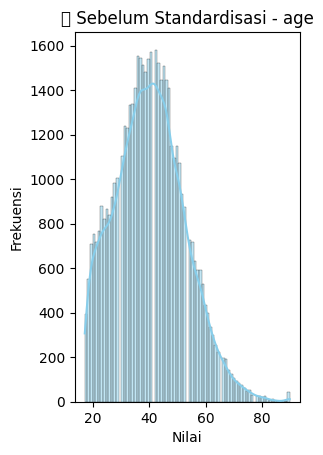

In [ ]:
#sebelum
plt.subplot(1, 2, 1)
sns.histplot(X_resampled.iloc[:, col_index], kde=True, color='skyblue')
plt.title(f'📊 Sebelum Standardisasi - {col_name}')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')


<ipython-input-27-869458ace13d>:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


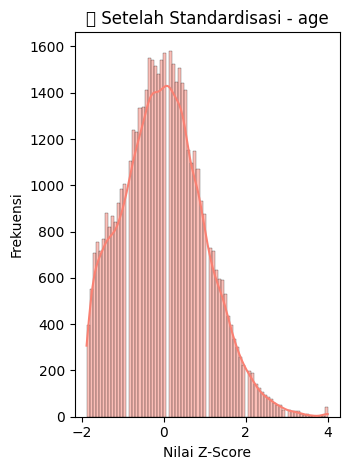

In [ ]:
#sesudah
plt.subplot(1, 2, 2)
sns.histplot(X_scaled[:, col_index], kde=True, color='salmon')
plt.title(f'📈 Setelah Standardisasi - {col_name}')
plt.xlabel('Nilai Z-Score')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[ 0.3751618 ,  1.60191279,  0.78589163, ..., -0.25671394,
        -1.91638392,  0.29991582],
       [-1.71849806,  0.13717972, -1.42912614, ..., -0.25671394,
        -2.35161411,  0.29991582],
       [-0.34956662, -1.32755334, -0.89827857, ..., -0.25671394,
         0.08567499,  0.29991582],
       ...,
       [-0.59114275,  0.13717972, -0.82482388, ...,  3.9133556 ,
        -0.17546313,  0.29991582],
       [ 0.21411104,  0.13717972,  0.01964736, ..., -0.25671394,
        -0.17546313, -1.47982824],
       [ 0.29463642, -1.32755334,  0.70994582, ..., -0.25671394,
         0.69499726,  0.29991582]])

In [ ]:
y_train

,income
29213,0
30006,0
41244,1
22169,0
45344,1
...,...
11284,0
44732,1
38158,1
860,0


##Modeling & Evaluasi

###Melatih dan Evaluasi Model

In [ ]:
#model yang digunakan sebagai patokan dan pemprosesan
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

melatih model

In [ ]:
results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "report": report,
        "confusion_matrix": cm,
        "training_time": training_time
    }


 Model: Decision Tree
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



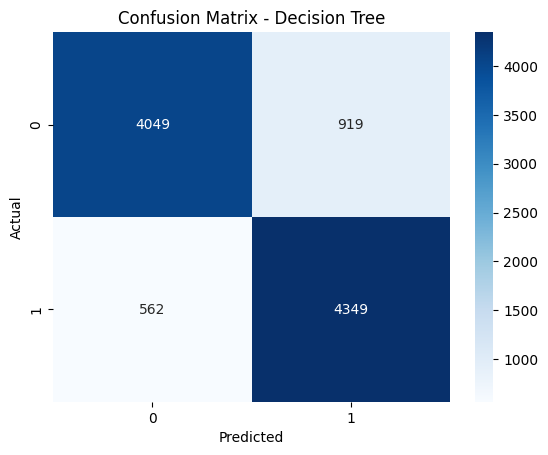


 Model: Random Forest
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



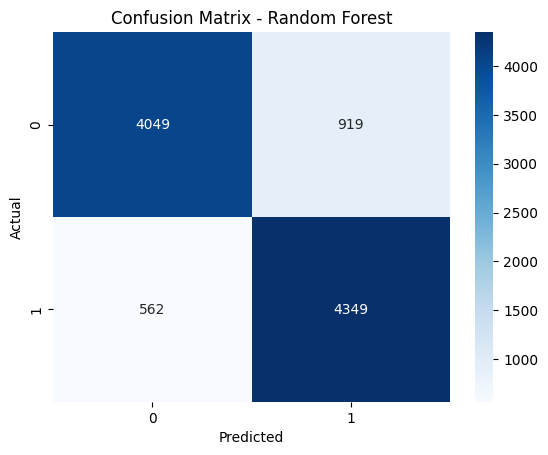


 Model: KNN
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



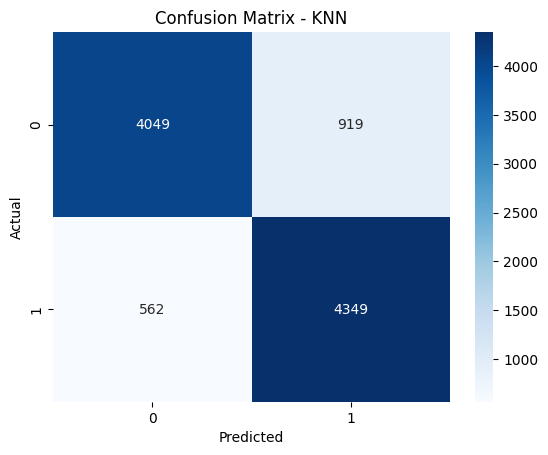


 Model: Logistic Regression
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



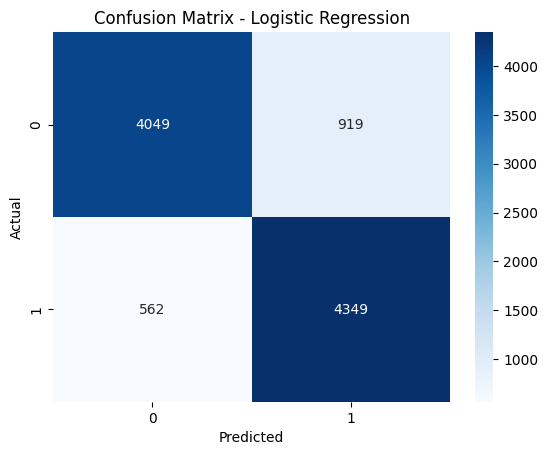


 Model: SVM
Training Time: 42.2174 seconds
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4968
           1       0.83      0.89      0.85      4911

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879



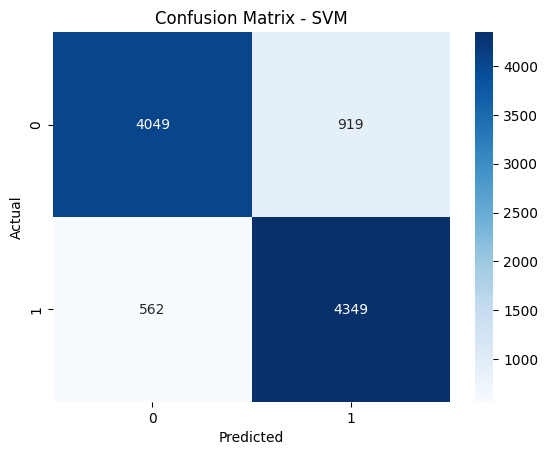

In [ ]:
for name, result in results.items():
    print(f"\n Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

###Ringkasan Hasil Evaluasi


In [ ]:
summary = []
for name, res in results.items():
    report = res["report"]
    summary.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "Training Time": res["training_time"]
    })

summary_df = pd.DataFrame(summary).sort_values(by="Accuracy", ascending=False)
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score  Training Time
1        Random Forest  0.889462   0.885368  0.893301  0.889317       5.904701
2                  KNN  0.853730   0.844259  0.865404  0.854701       0.141411
0        Decision Tree  0.850795   0.841854  0.861739  0.851680       0.250774
4                  SVM  0.850086   0.825550  0.885563  0.854504      42.217359
3  Logistic Regression  0.766576   0.756146  0.782936  0.769308       0.061551


###Kesimpulan dan Rekomendasi

In [ ]:
best_model = summary_df.iloc[0]
print("\n Model Terbaik:")
print(best_model)


 Model Terbaik:
Model            Random Forest
Accuracy              0.889462
Precision             0.885368
Recall                0.893301
F1-Score              0.889317
Training Time         5.904701
Name: 1, dtype: object
